In [1]:
import tensorflow.keras as keras
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10_000)


In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
# Preproccessing
def V(data, dim=10_000):
    vec = np.zeros((len(data), dim))
    for i, x in enumerate(data):
        vec[i, x] = 1
    return vec

x_vec_train = V(x_train)
x_vec_test = V(x_test)
y_vec_train = to_categorical(y_train)
y_vec_test = to_categorical(y_test)

In [3]:
# Make the model
print(x_train.shape)
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10_000, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


(8982,)


In [4]:
print(y_train)
x_val, partial_x_train = x_vec_train[:1000], x_vec_train[1000:]
y_val, partial_y_train = y_vec_train[:1000], y_vec_train[1000:]
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


[ 3  4  3 ... 25  3 25]
Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.6313 - accuracy: 0.5003 - val_loss: 1.7714 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.4755 - accuracy: 0.6830 - val_loss: 1.3593 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.1046 - accuracy: 0.7573 - val_loss: 1.1722 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8720 - accuracy: 0.8138 - val_loss: 1.0679 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6980 - accuracy: 0.8520 - val_loss: 1.0096 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5598 - accuracy: 0.8820 - val_loss: 0.9610 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4477 - accuracy: 0.9049 - val_loss: 0.9296 - val_accura

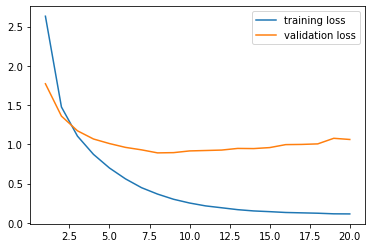

In [5]:
import matplotlib.pyplot as plt
hist = history.history
epochs = range(1, 21)
plt.plot(epochs, hist['loss'], label='training loss')
plt.plot(epochs, hist['val_loss'], label='validation loss')
plt.legend()

In [6]:
predictions = model.predict(x_val)


NameError: name 'yT' is not defined